## Master's Project Visualization

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [65]:
df = pd.read_csv("Survey Results v3.csv")

In [66]:
df.head()

,Q1-1,Q1-2,Q1-3,Q1-4,Q1-5,Q1-6,Q1-7,Q1-8,Q1-9,Q1-10,Q1-11,Q1-12,Q2-1,Q2-2,Q2-3
0,Less than 5 days,45 to 52 hours,9 am to 10 am,7 pm to 8 pm,1 to 5 years,Medium-sized company (from 100 to 300 employees),Other position (Please specify),No,4,3.0,3,3,Male,24 to 30 years old,No
1,5 days,45 to 52 hours,9 am to 10 am,6 pm to 7 pm,1 to 5 years,Large company (more than 300 employees),Junior Engineer,Yes,4,4.0,3,3,Male,18 to 24 years old,No
2,5 days,Less than 45 hours,9 am to 10 am,6 pm to 7 pm,1 to 5 years,Micro or small company (less than 100 employees),Senior Engineer,Yes,3,3.0,2,2,Male,18 to 24 years old,No
3,5 days,45 to 52 hours,9 am to 10 am,8 pm to 9 pm,1 to 5 years,Large company (more than 300 employees),Senior Engineer,No,2,2.0,4,3,Male,24 to 30 years old,No
4,6 days,53 to 60 hours,8 am to 9 am,10 pm to 11 pm,1 to 5 years,Medium-sized company (from 100 to 300 employees),Senior Engineer,No,3,3.0,4,4,Male,24 to 30 years old,Yes


## Preprocess

In [0]:
df_new = pd.DataFrame()

In [0]:
for i in range(8):
    column_name = 'Q1-' + str(i+1)
    print(column_name)
    df_new[column_name] = [string.split('/')[1].strip() if type(string) != float else 'nan' for string in df[column_name]]

Q1-1
Q1-2
Q1-3
Q1-4
Q1-5
Q1-6
Q1-7
Q1-8


In [0]:
for i in range(3):
    column_name = 'Q2-' + str(i+1)
    print(column_name)
    df_new[column_name] = [string.split('/')[1].strip() if type(string) != float else 'nan' for string in df[column_name]]

Q2-1
Q2-2
Q2-3


In [0]:
df_new

,Q1-1,Q1-2,Q1-3,Q1-4,Q1-5,Q1-6,Q1-7,Q1-8,Q2-1,Q2-2,Q2-3
0,Less than 5 days,45 to 52 hours,9 am to 10 am,7 pm to 8 pm,1 to 5 years,Medium-sized company (from 100 to 300 employees),Other position (Please specify),No,Male,24 to 30 years old,No
1,5 days,45 to 52 hours,9 am to 10 am,6 pm to 7 pm,1 to 5 years,Large company (more than 300 employees),Junior Engineer,Yes,Male,18 to 24 years old,No
2,5 days,Less than 45 hours,9 am to 10 am,6 pm to 7 pm,1 to 5 years,Micro or small company (less than 100 employees),Senior Engineer,Yes,Male,18 to 24 years old,No
3,5 days,45 to 52 hours,9 am to 10 am,8 pm to 9 pm,1 to 5 years,Large company (more than 300 employees),Senior Engineer,No,Male,24 to 30 years old,No
4,6 days,53 to 60 hours,8 am to 9 am,10 pm to 11 pm,1 to 5 years,Medium-sized company (from 100 to 300 employees),Senior Engineer,No,Male,24 to 30 years old,Yes
...,...,...,...,...,...,...,...,...,...,...,...
411,5 days,53 to 60 hours,9 am to 10 am,10 pm to 11 pm,1 to 5 years,Large company (more than 300 employees),Junior Engineer,No,Female,24 to 30 years old,Yes
412,6 days,53 to 60 hours,9 am to 10 am,9 pm to 10 pm,1 to 5 years,Micro or small company (less than 100 employees),Senior Engineer,No,Male,24 to 30 years old,Yes
413,5 days,45 to 52 hours,9 am to 10 am,7 pm to 8 pm,1 to 5 years,Micro or small company (less than 100 employees),Junior Engineer,No,Male,18 to 24 years old,Yes
414,6 days,61 to 68 hours,9 am to 10 am,9 pm to 10 pm,5 to 10 years,Micro or small company (less than 100 employees),Senior Engineer,No,Male,24 to 30 years old,No


In [0]:
df_new.to_csv("Survey Results v3.csv", index=False)

## Visualization

In [310]:
workday = Counter(df['Q1-1'])

In [311]:
workday

Counter({'5 days': 285, '6 days': 121, '7 days': 6, 'Less than 5 days': 4})

In [312]:
label = ['Less than 5 days','5 days','6 days','7 days']

In [313]:
freq = [workday[string] for string in label]

In [314]:
plt.rc('font', family='Times New Roman', size = 15)

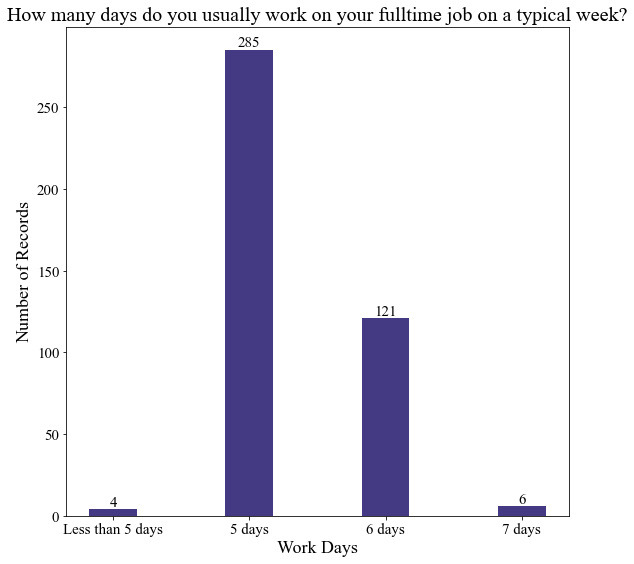

In [315]:
plt.figure(figsize=(9, 9))
bar = plt.bar(label, freq, width = 0.35, color='#443a83')
plt.xlabel("Work Days", fontsize = 18)
plt.ylabel("Number of Records", fontsize = 18)
plt.title("How many days do you usually work on your fulltime job on a typical week?", fontsize = 20)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
plt.show()

In [316]:
workhour = Counter(df['Q1-2'])

In [317]:
workhour

Counter({'45 to 52 hours': 159,
         '53 to 60 hours': 107,
         '61 to 68 hours': 62,
         '69 to 76 hours': 21,
         'Less than 45 hours': 59,
         'More than 76 hours': 7,
         nan: 1})

In [318]:
label = ['Less than 45 hours','45 to 52 hours','53 to 60 hours','61 to 68 hours','69 to 76 hours','More than 76 hours']

In [319]:
freq = [workhour[string] for string in label]

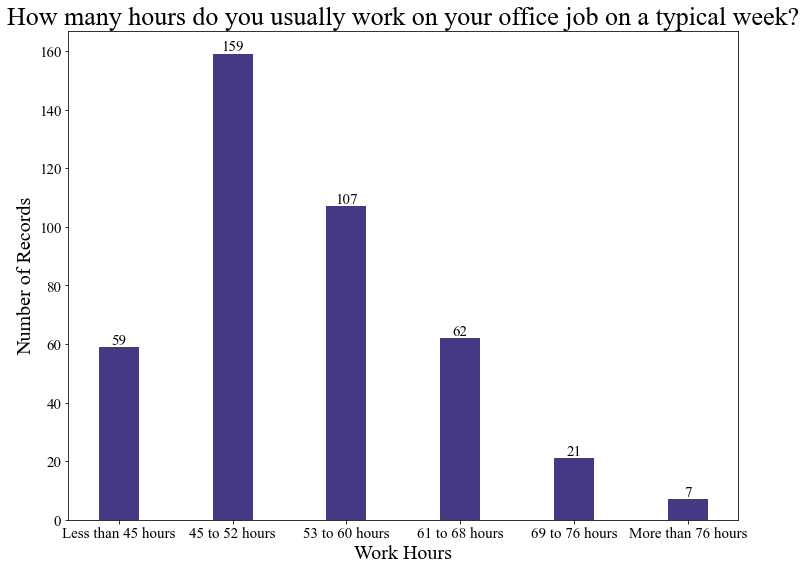

In [320]:
plt.figure(figsize=(12, 9))
bar = plt.bar(label, freq, width = 0.35, color='#443a83')
plt.xlabel("Work Hours", fontsize = 20)
plt.ylabel("Number of Records", fontsize = 20)
plt.title("How many hours do you usually work on your office job on a typical week?", fontsize = 26)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
plt.show()

In [321]:
work_experience = Counter(df['Q1-5'])

In [322]:
work_experience

Counter({'1 to 5 years': 270,
         '5 to 10 years': 102,
         'Less than 1 year': 20,
         'More than 10 years': 24})

In [323]:
label = ['Less than 1 year','1 to 5 years','5 to 10 years','More than 10 years']
freq = [work_experience[string] for string in label]

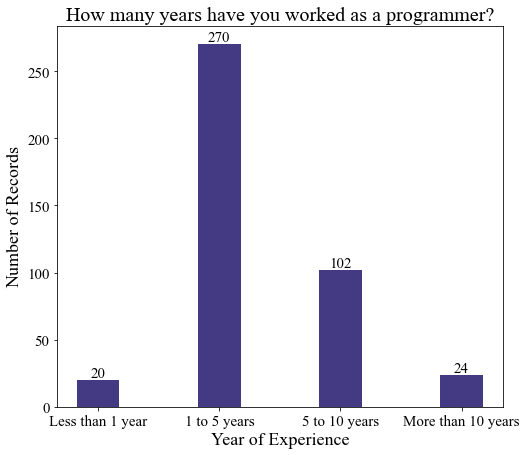

In [324]:
plt.figure(figsize=(8, 7))
bar = plt.bar(label, freq, width = 0.35, color='#443a83')
plt.xlabel("Year of Experience", fontsize = 18)
plt.ylabel("Number of Records", fontsize = 18)
plt.title("How many years have you worked as a programmer?", fontsize = 20)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
plt.show()

In [325]:
age = Counter(df['Q2-2'])
age

Counter({'18 to 24 years old': 55,
         '24 to 30 years old': 266,
         '30 to 36 years old': 76,
         '36 to 42 years old': 5,
         '42 to 48 years old': 1,
         nan: 13})

In [326]:
label = ['18 to 24 years old','24 to 30 years old','30 to 36 years old','36 to 42 years old','42 to 48 years old']
freq = [age[string] for string in label]

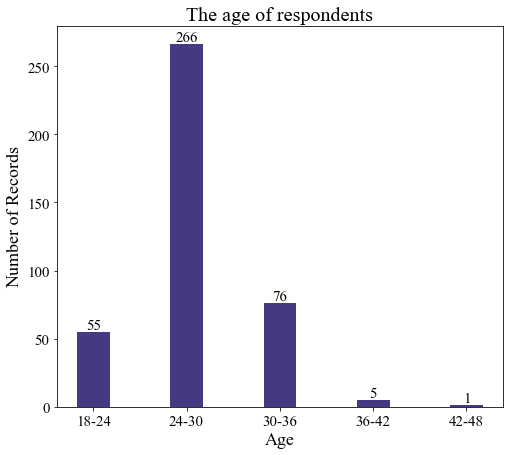

In [327]:
plt.figure(figsize=(8, 7))
bar = plt.bar(['18-24','24-30','30-36','36-42','42-48'], freq, width = 0.35, color='#443a83')
plt.xlabel("Age", fontsize = 18)
plt.ylabel("Number of Records", fontsize = 18)
plt.title("The age of respondents", fontsize = 20)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
plt.show()

In [350]:
df_45 = df[df['Q1-2'] == 'Less than 45 hours']
freq_45 = Counter(df_45['Q1-9'])
freq_45

Counter({1: 9, 2: 17, 3: 16, 4: 12, 5: 5})

In [351]:
df_52 = df[df['Q1-2'] == '45 to 52 hours']
freq_52 = Counter(df_52['Q1-9'])

In [352]:
df_60 = df[df['Q1-2'] == '53 to 60 hours']
freq_60 = Counter(df_60['Q1-9'])

In [353]:
df_68 = df[df['Q1-2'] == '61 to 68 hours']
freq_68 = Counter(df_68['Q1-9'])

In [354]:
df_76 = df[df['Q1-2'] == '69 to 76 hours']
freq_76 = Counter(df_76['Q1-9'])

In [355]:
df_over76 = df[df['Q1-2'] == 'More than 76 hours']
freq_over76 = Counter(df_over76['Q1-9'])

In [356]:
group1 = []
group2 = []
group3 = []
group4 = []
group5 = []
all_group = [group1,group2,group3,group4,group5]
for index, group in enumerate(all_group):
    group.append(freq_45[index+1])
    group.append(freq_52[index+1])
    group.append(freq_60[index+1])
    group.append(freq_68[index+1])
    group.append(freq_76[index+1])
    group.append(freq_over76[index+1])

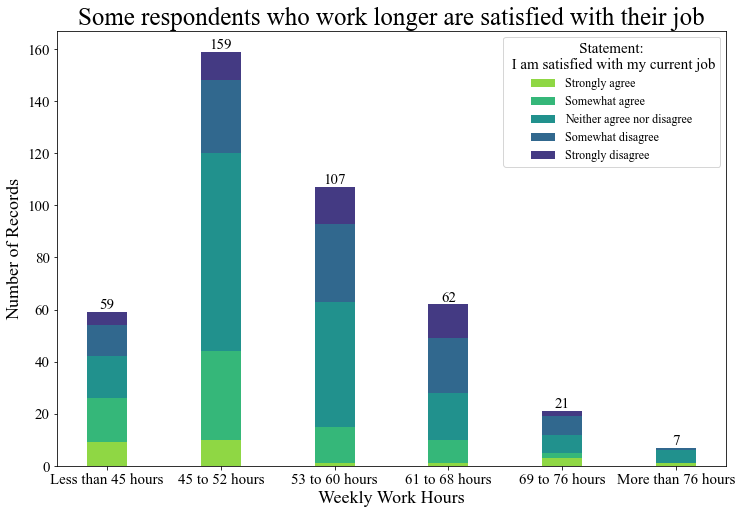

In [357]:
labels = ['Less than 45 hours','45 to 52 hours','53 to 60 hours','61 to 68 hours','69 to 76 hours','More than 76 hours']
width = 0.35       # the width of the bars: can also be len(x) sequence
bar12 = np.add(group1, group2).tolist()
bar123 = np.add(bar12, group3).tolist()
bar1234 = np.add(bar123, group4).tolist()

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(labels, group1, width, label='Strongly agree', color='#8fd744')
ax.bar(labels, group2, width, bottom=group1, label='Somewhat agree', color='#35b779')
ax.bar(labels, group3, width, bottom=bar12, label='Neither agree nor disagree', color='#21918d')
ax.bar(labels, group4, width, bottom=bar123, label='Somewhat disagree', color='#31688e')
bar5 = ax.bar(labels, group5, width, bottom=bar1234, label='Strongly disagree', color='#443a83')

for index, rect in enumerate(bar5):
    height = rect.get_height() + bar1234[index]
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

ax.set_xlabel("Weekly Work Hours", fontsize = 18)
ax.set_ylabel("Number of Records", fontsize = 18)
ax.set_title("Some respondents who work longer are satisfied with their job", fontsize = 25, weight='bold')
ax.legend(title="                   Statement: \n I am satisfied with my current job", fontsize=12)

plt.show()

In [358]:
Counter(df['Q1-4'])

Counter({'10 pm to 11 pm': 37,
         '11 pm to midnight': 19,
         '6 pm to 7 pm': 79,
         '7 pm to 8 pm': 81,
         '8 pm to 9 pm': 91,
         '9 pm to 10 pm': 79,
         'Earlier than 6 pm': 28,
         'Later than midnight': 2})

In [359]:
df_6 = df[df['Q1-4'] == 'Earlier than 6 pm']
freq_6 = Counter(df_6['Q1-11'])

df_7 = df[df['Q1-4'] == '6 pm to 7 pm']
freq_7 = Counter(df_7['Q1-11'])

df_8 = df[df['Q1-4'] == '7 pm to 8 pm']
freq_8 = Counter(df_8['Q1-11'])

df_9 = df[df['Q1-4'] == '8 pm to 9 pm']
freq_9 = Counter(df_9['Q1-11'])

df_10 = df[df['Q1-4'] == '9 pm to 10 pm']
freq_10 = Counter(df_10['Q1-11'])

df_11 = df[df['Q1-4'] == '10 pm to 11 pm']
freq_11 = Counter(df_11['Q1-11'])

df_12 = df[df['Q1-4'] == '11 pm to midnight']
freq_12 = Counter(df_12['Q1-11'])

df_13 = df[df['Q1-4'] == 'Later than midnight']
freq_13 = Counter(df_13['Q1-11'])

In [360]:
group1 = []
group2 = []
group3 = []
group4 = []
group5 = []
all_group = [group1,group2,group3,group4,group5]
for index, group in enumerate(all_group):
    group.append(freq_6[index+1])
    group.append(freq_7[index+1])
    group.append(freq_8[index+1])
    group.append(freq_9[index+1])
    group.append(freq_10[index+1])
    group.append(freq_11[index+1])
    group.append(freq_12[index+1])
    group.append(freq_13[index+1])

In [361]:
group2

[5, 12, 17, 3, 8, 0, 4, 0]

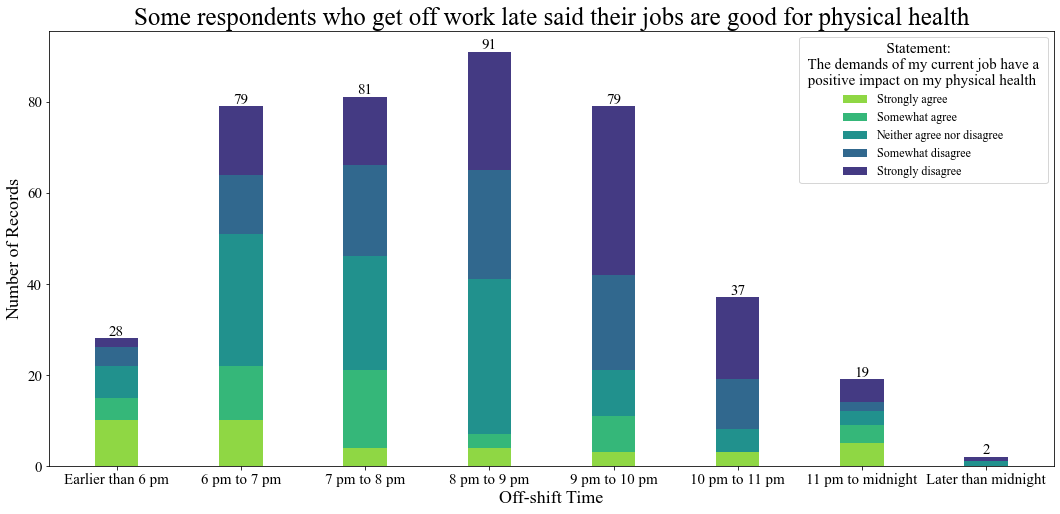

In [362]:
labels = ['Earlier than 6 pm','6 pm to 7 pm','7 pm to 8 pm','8 pm to 9 pm','9 pm to 10 pm','10 pm to 11 pm', '11 pm to midnight', 'Later than midnight']
width = 0.35       # the width of the bars: can also be len(x) sequence
bar12 = np.add(group1, group2).tolist()
bar123 = np.add(bar12, group3).tolist()
bar1234 = np.add(bar123, group4).tolist()

fig, ax = plt.subplots(figsize=(18, 8))

ax.bar(labels, group1, width, label='Strongly agree', color='#8fd744')
ax.bar(labels, group2, width, bottom=group1, label='Somewhat agree', color='#35b779')
ax.bar(labels, group3, width, bottom=bar12, label='Neither agree nor disagree', color='#21918d')
ax.bar(labels, group4, width, bottom=bar123, label='Somewhat disagree', color='#31688e')
bar5 = ax.bar(labels, group5, width, bottom=bar1234, label='Strongly disagree', color='#443a83')

for index, rect in enumerate(bar5):
    height = rect.get_height() + bar1234[index]
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

ax.set_xlabel("Off-shift Time", fontsize = 18)
ax.set_ylabel("Number of Records", fontsize = 18)
ax.set_title("Some respondents who get off work late said their jobs are good for physical health", fontsize = 25, weight='bold')
ax.legend(title="                      Statement: \n The demands of my current job have a \n positive impact on my physical health", fontsize=12)

plt.show()

In [363]:
df_6 = df[df['Q1-4'] == 'Earlier than 6 pm']
freq_6 = Counter(df_6['Q1-12'])

df_7 = df[df['Q1-4'] == '6 pm to 7 pm']
freq_7 = Counter(df_7['Q1-12'])

df_8 = df[df['Q1-4'] == '7 pm to 8 pm']
freq_8 = Counter(df_8['Q1-12'])

df_9 = df[df['Q1-4'] == '8 pm to 9 pm']
freq_9 = Counter(df_9['Q1-12'])

df_10 = df[df['Q1-4'] == '9 pm to 10 pm']
freq_10 = Counter(df_10['Q1-12'])

df_11 = df[df['Q1-4'] == '10 pm to 11 pm']
freq_11 = Counter(df_11['Q1-12'])

df_12 = df[df['Q1-4'] == '11 pm to midnight']
freq_12 = Counter(df_12['Q1-12'])

df_13 = df[df['Q1-4'] == 'Later than midnight']
freq_13 = Counter(df_13['Q1-12'])

In [364]:
group1 = []
group2 = []
group3 = []
group4 = []
group5 = []
all_group = [group1,group2,group3,group4,group5]
for index, group in enumerate(all_group):
    group.append(freq_6[index+1])
    group.append(freq_7[index+1])
    group.append(freq_8[index+1])
    group.append(freq_9[index+1])
    group.append(freq_10[index+1])
    group.append(freq_11[index+1])
    group.append(freq_12[index+1])
    group.append(freq_13[index+1])

In [365]:
group2

[6, 17, 18, 13, 8, 0, 3, 0]

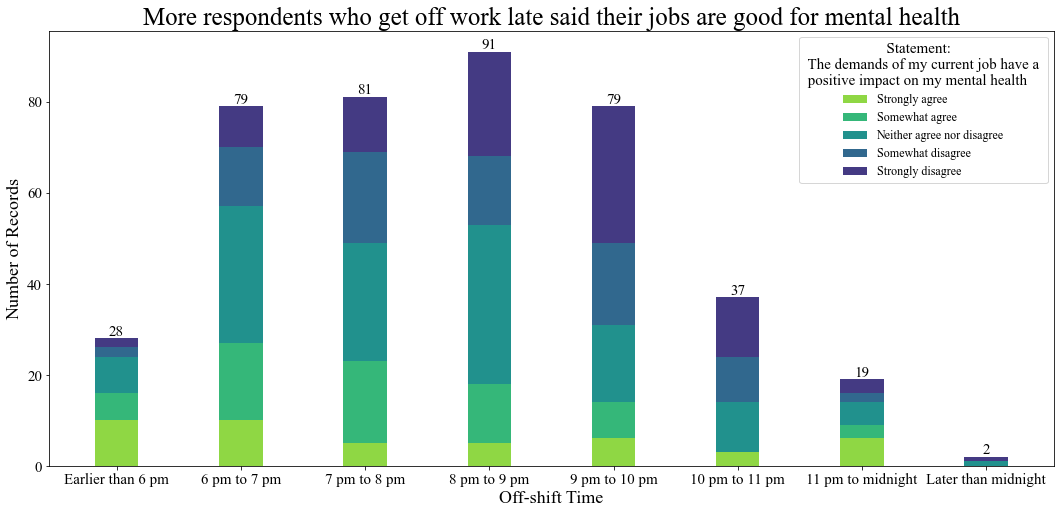

In [366]:
labels = ['Earlier than 6 pm','6 pm to 7 pm','7 pm to 8 pm','8 pm to 9 pm','9 pm to 10 pm','10 pm to 11 pm', '11 pm to midnight', 'Later than midnight']
width = 0.35       # the width of the bars: can also be len(x) sequence
bar12 = np.add(group1, group2).tolist()
bar123 = np.add(bar12, group3).tolist()
bar1234 = np.add(bar123, group4).tolist()

fig, ax = plt.subplots(figsize=(18, 8))

ax.bar(labels, group1, width, label='Strongly agree', color='#8fd744')
ax.bar(labels, group2, width, bottom=group1, label='Somewhat agree', color='#35b779')
ax.bar(labels, group3, width, bottom=bar12, label='Neither agree nor disagree', color='#21918d')
ax.bar(labels, group4, width, bottom=bar123, label='Somewhat disagree', color='#31688e')
bar5 = ax.bar(labels, group5, width, bottom=bar1234, label='Strongly disagree', color='#443a83')

for index, rect in enumerate(bar5):
    height = rect.get_height() + bar1234[index]
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

ax.set_xlabel("Off-shift Time", fontsize = 18)
ax.set_ylabel("Number of Records", fontsize = 18)
ax.set_title("More respondents who get off work late said their jobs are good for mental health", fontsize = 25, weight='bold')
ax.legend(title="                      Statement: \n The demands of my current job have a \n positive impact on my mental health", fontsize=12)

plt.show()

In [367]:
df_salary = pd.read_csv("Average Salary.csv")

In [368]:
df_salary

,Year,Average Salary of City Employees (Yuan),Average Salary of City Employees in the information technology industry (Yuan)
0,2003,13969,30897
1,2004,15920,33449
2,2005,18200,38799
3,2006,20856,43435
4,2007,24721,47700
5,2008,28898,54906
6,2009,32244,58154
7,2010,36539,64436
8,2011,41799,70918
9,2012,46769,80510


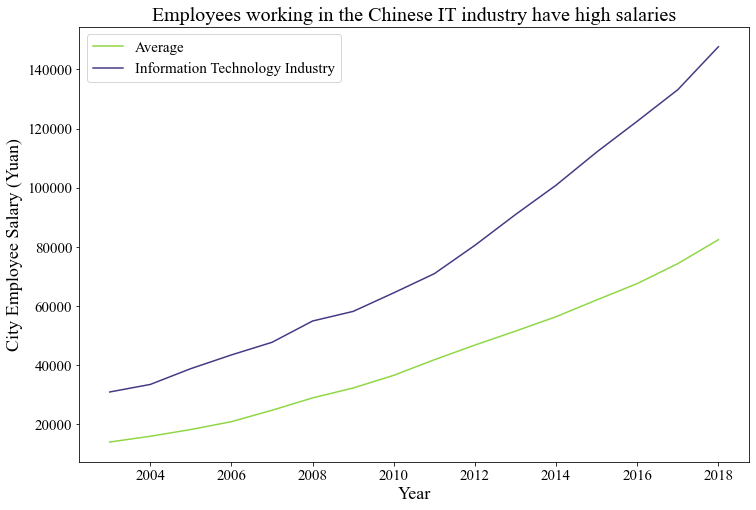

In [369]:
plt.figure(figsize=(12, 8))
plt.plot(df_salary['Year'], df_salary['Average Salary of City Employees (Yuan)'], label='Average', color='#8fd744')
plt.plot(df_salary['Year'], df_salary['Average Salary of City Employees in the information technology industry (Yuan)'], label='Information Technology Industry', color='#443a83')

plt.xlabel("Year", fontsize = 18)
plt.ylabel("City Employee Salary (Yuan)", fontsize = 18)
plt.title("Employees working in the Chinese IT industry have high salaries", fontsize = 20)
plt.legend()
plt.show()

In [372]:
label = ['Less than 30 hours', '30 to 39 hours', '40 to 45 hours', '46 hours', '47 to 49 hours', 'More than 49 hours']
data = [1, 64, 56, 7, 8, 3]

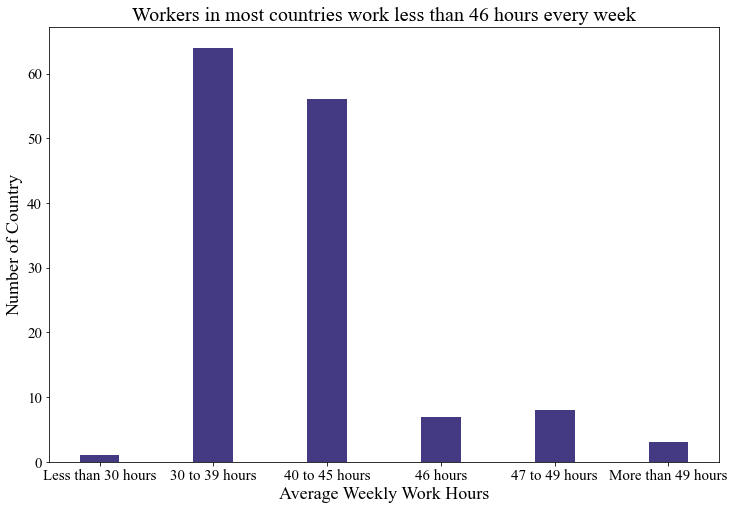

In [373]:
plt.figure(figsize=(12, 8))
plt.bar(label, data, width=0.35, color='#443a83')

plt.xlabel("Average Weekly Work Hours", fontsize = 18)
plt.ylabel("Number of Country", fontsize = 18)
plt.title("Workers in most countries work less than 46 hours every week", fontsize = 20)
plt.show()